# AI Avenue 2: Introduction to Computer Vision NB3
## Building a Sequential model using Keras with TensorFlow

In [1]:
# Setup dataset
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define the path to the training dataset
train_path = '/kaggle/input/sample-dataset-1/data/train'

# Define the path to the validation dataset
valid_path = '/kaggle/input/sample-dataset-1/data/valid'

# Define the path to the test dataset
test_path = '/kaggle/input/sample-dataset-1/data/test'

In [3]:
# Check if the 'train_path' is a directory and print the result
print(os.path.isdir(train_path))

# Check if the 'valid_path' is a directory and print the result
print(os.path.isdir(valid_path))

# Check if the 'test_path' is a directory and print the result
print(os.path.isdir(test_path))

True
True
True


In [4]:
# Apply data augmentation to the training batch
train_batches = ImageDataGenerator().flow_from_directory(
  directory=train_path,
  target_size=(224, 224),
  classes=['cat', 'dog'],
  batch_size=10
)

# Validation set
valid_batches = ImageDataGenerator().flow_from_directory(
  directory=valid_path,
  target_size=(224,224),
  classes=['cat', 'dog'],
  batch_size=10
)

# Test set
test_batches = ImageDataGenerator().flow_from_directory(
  directory=test_path,
  target_size=(224,224),
  classes=['cat', 'dog'],
  batch_size=10,
  shuffle=False
)

Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [5]:
# Get a batch of images and their corresponding labels from the training dataset
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr):
    # Create a figure with 10 subplots arranged in a single row
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()

    # Display each image in the 'images_arr' on a separate subplot
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

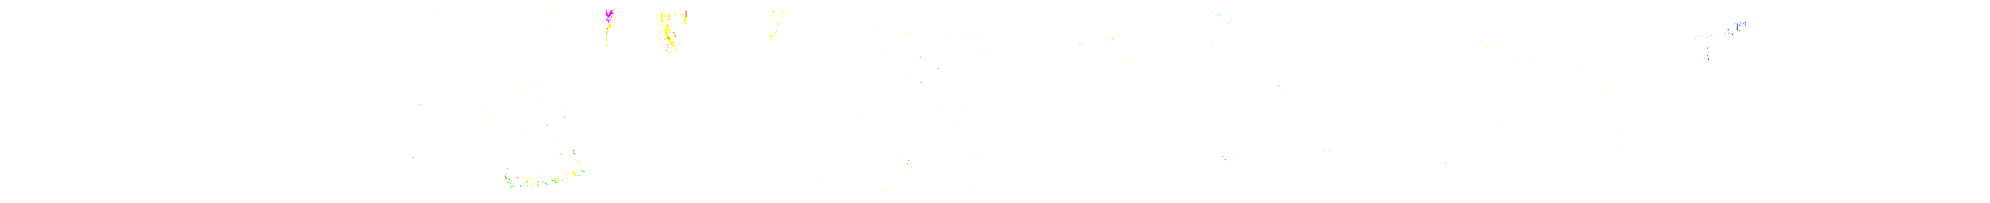

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [7]:
# Plot the batch of images using the 'plotImages' function
plotImages(imgs)

# Print the corresponding labels for the batch of images
print(labels)

# Model Setup

In [4]:
# Import and include necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Input shape
input_shape = (224, 224, 3)

# 224 * 224 * 3
# Build model
model = Sequential([
    Flatten(input_shape=input_shape), 
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Summarize model's layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │     2,408,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,409,074 (9.19 MB)

 Trainable params: 2,409,074 (9.19 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Adds layer to the model
model.add(Dense(units=64, activation='relu'))

In [9]:
# Removes layer from the model
model.pop()

<Dense name=dense_3, built=True>

In [14]:
# Builds and configures model's learning processes
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
# Number of training and validation steps
train_steps = len(train_batches)
valid_steps = len(valid_batches)

In [17]:
# Feed training data to model
history = model.fit(
    train_batches,
    steps_per_epoch=train_steps,
    validation_data=valid_batches,
    validation_steps=valid_steps,
    epochs=3,
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/3


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715154580.436595     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715154580.451996     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715154722.141136     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1750/1750 - 182s - 104ms/step - accuracy: 0.5171 - loss: 2.4658 - val_accuracy: 0.5824 - val_loss: 0.6841
Epoch 2/3
1750/1750 - 0s - 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/3


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1750/1750 - 51s - 29ms/step - accuracy: 0.5038 - loss: 1.3469 - val_accuracy: 0.5000 - val_loss: 2.1276


In [ ]:
# Retrieve training and validation accuracy from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a list of epochs for the x-axis
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')  # Blue line for training accuracy
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')  # Red line for validation accuracy

# Add title and labels to the plot
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend to differentiate between training and validation accuracy
plt.legend()

# Show the plot
plt.show()

# Saving Model

## model.save()

In [18]:
# Checks first to see if file exists already.
# If not, the model is saved to specified directory.
if os.path.isfile('/kaggle/working/models/catvdog_trial_model.h5') is False:
    model.save('/kaggle/working/models/catvdog_trial_model.h5')

In [19]:
# Load the model\
from tensorflow.keras.models import load_model
new_model = load_model('/kaggle/working/models/catvdog_trial_model.h5')

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │     2,408,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,409,076 (9.19 MB)

 Trainable params: 2,409,074 (9.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## model.to_json()

In [13]:
#save as JSON
json_string = model.to_json()

In [14]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [15]:
model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │     2,408,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,409,074 (9.19 MB)

 Trainable params: 2,409,074 (9.19 MB)

 Non-trainable params: 0 (0.00 B)

## model.save_weights()

In [16]:
# Checks first see if file exists already.
# If not, the weights are saved to the specified directory.
if os.path.isfile('/kaggle/working/models/my_model.weights.h5') is False:
    model.save_weights('/kaggle/working/models/my_model.weights.h5')

In [17]:
# Input shape
input_shape = (224, 224, 3)

# Build model
model2 = Sequential([
    Flatten(input_shape=input_shape), 
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [18]:
model2.load_weights('/kaggle/working/models/my_model.weights.h5')

In [19]:
model2.get_weights()

[array([[ 3.3512488e-03,  5.8154669e-03, -3.9748005e-03, ...,
          4.2515481e-03, -2.4833004e-03, -3.8973766e-03],
        [-1.9804542e-03, -1.8212483e-03, -6.1438372e-03, ...,
          7.8242132e-04,  3.3373451e-03, -1.5193992e-03],
        [-2.0799574e-03,  7.5731694e-04,  3.5441131e-03, ...,
         -1.8245095e-03, -3.8252445e-03, -5.6925653e-03],
        ...,
        [-5.7730367e-03, -4.2184591e-03,  1.6218239e-03, ...,
          5.2342406e-03, -4.5783422e-03,  8.5110689e-04],
        [-6.4067300e-03, -4.2587197e-03,  2.5753125e-05, ...,
         -6.2563305e-04, -8.0386543e-04, -5.7627968e-03],
        [ 2.3289686e-03,  4.3039415e-03, -1.9562840e-03, ...,
         -1.2961698e-03, -4.7506974e-03,  5.3079193e-03]], dtype=float32),
 array([-3.0178521e-04, -4.9402151e-04, -6.0046843e-04, -1.2502440e-03,
        -6.0047180e-04, -6.0048740e-04, -1.7187554e-05, -6.0051196e-04,
        -6.0050172e-04, -1.6927739e-03, -5.5585039e-04,  1.1743773e-05,
         7.9895899e-04, -5.3468545